In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import utils
from utils import forward_backwards_integration_and_merge_value
from utils import find_eigenvalue_secant_method

In [3]:
from Differential_Problem_Quan_Harm_Osci import DP_QHO as diff_prob
from Integrators import predictor_corrector_RK4_Adams_Moulton4 as integrator

E_grid= np.linspace(0.45, 10, num=100)
grid= np.linspace(-6.5, 6.5, num=3000) + 0.001
grid_b= np.flip(grid)

u0=((1.0/np.pi)**(1.0/4.0))*np.exp((-1.0*grid**2.0)/2.0)
u0_b=((1.0/np.pi)**(1.0/4.0))*np.exp((-1.0*grid_b**2.0)/2.0)
E0=0.5
u1=(2.0**0.5)*np.multiply(grid,u0)
E1=1.5

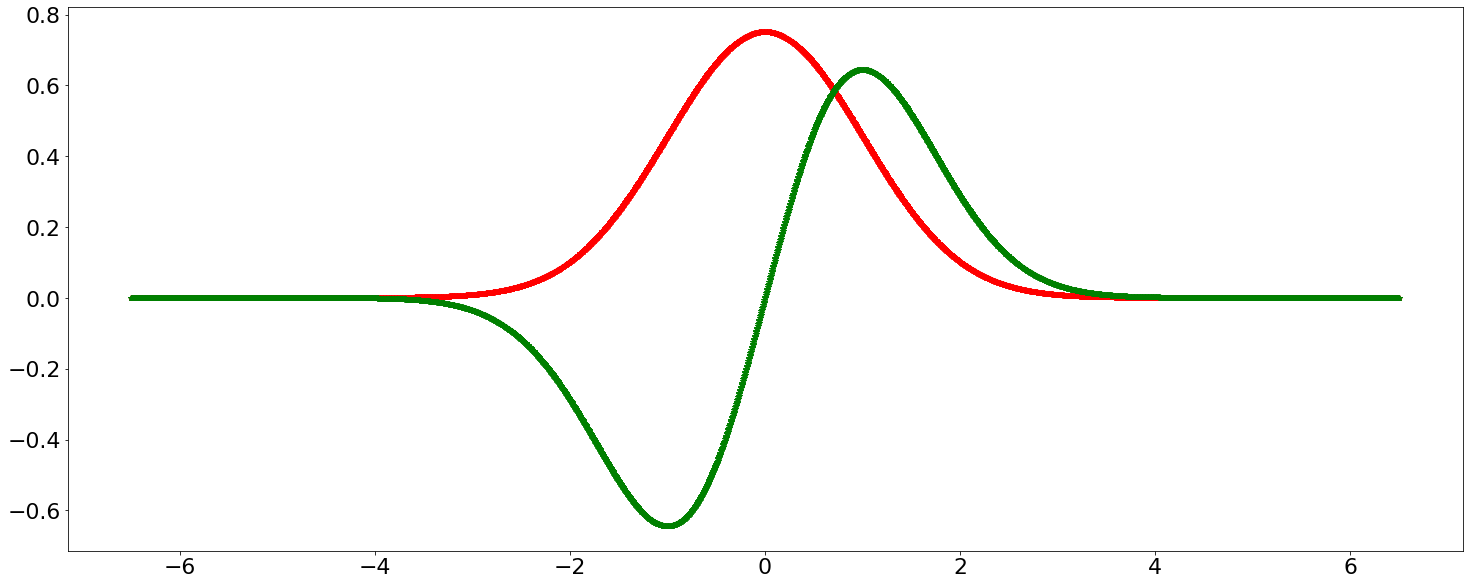

In [4]:
plt.plot(grid,u0,'r*', grid,u1,'g*')
plt.show()

In [5]:
delta= abs(grid[1] - grid[0])
delta_b= abs(grid[-1] - grid[-2])

y1_f=1.0e-6#u0[0]
y2_f=((1.1e-6-y1_f)/delta)
y1_b=1.0e-6
y2_b=((1.1e-6-y1_f)/delta)

 from i_nodes  (0.45, 0.5464646464646465)
 eigen  0.5024461614360678


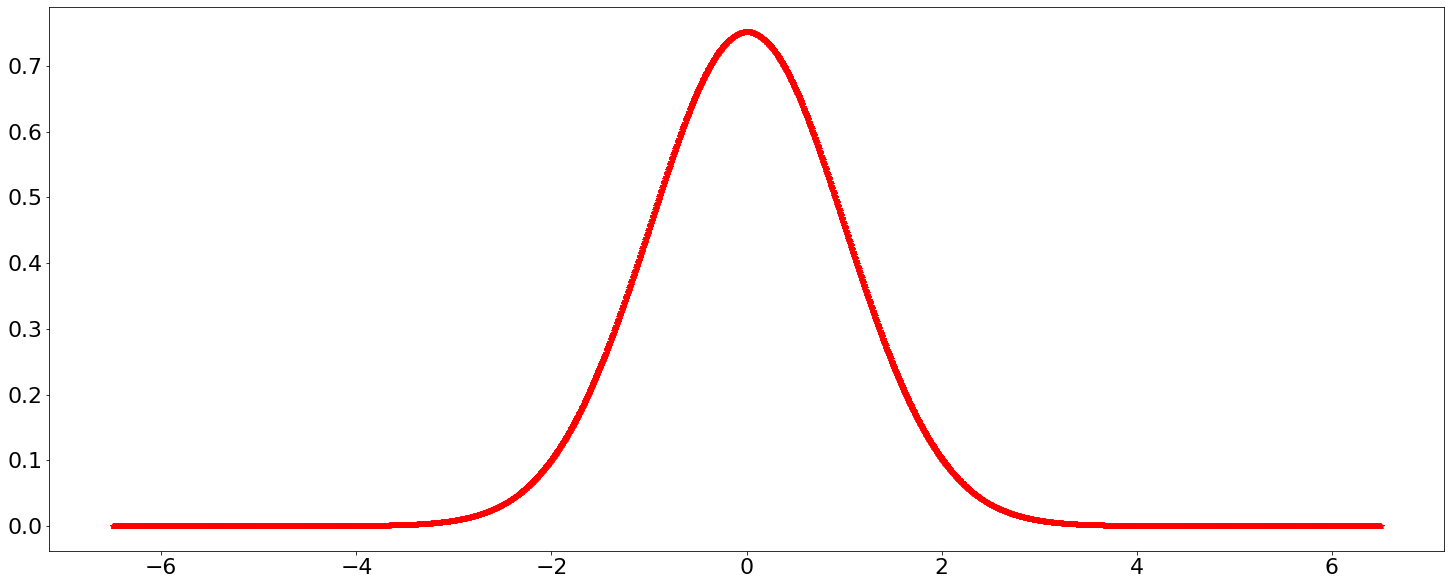

 from i_nodes  (1.4146464646464647, 1.5111111111111113)
 eigen  1.5022954284532068


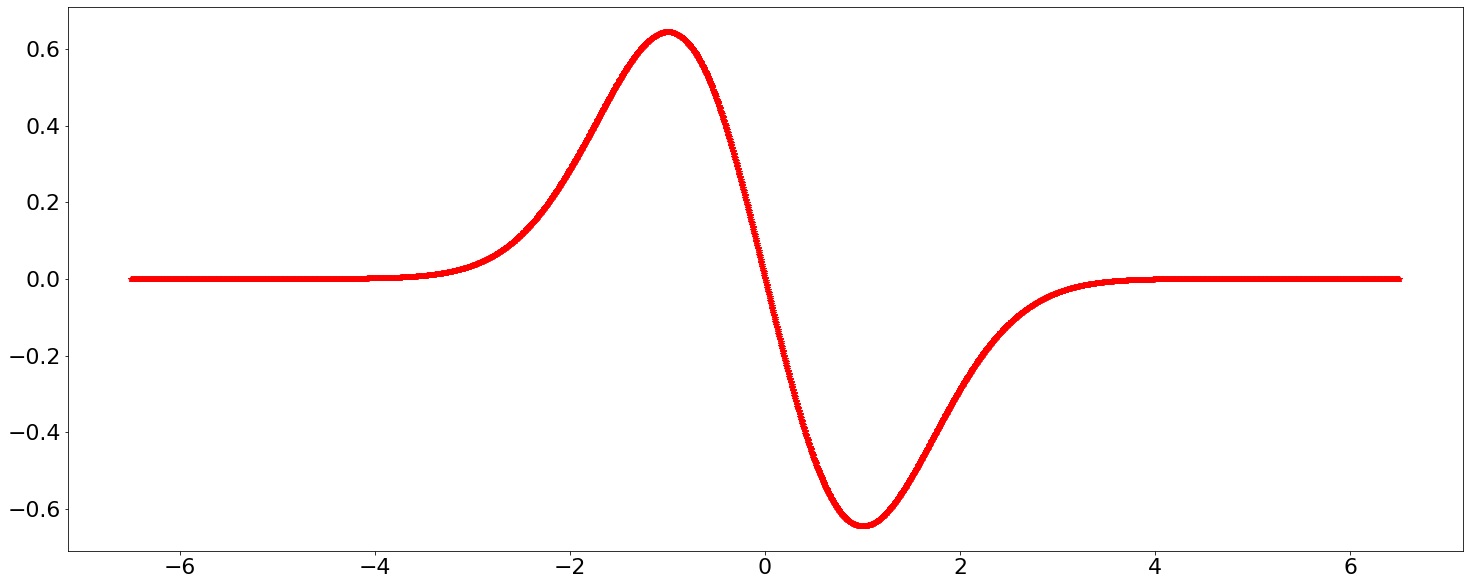

 from i_nodes  (2.475757575757576, 2.572222222222223)
 eigen  2.5022248051878337


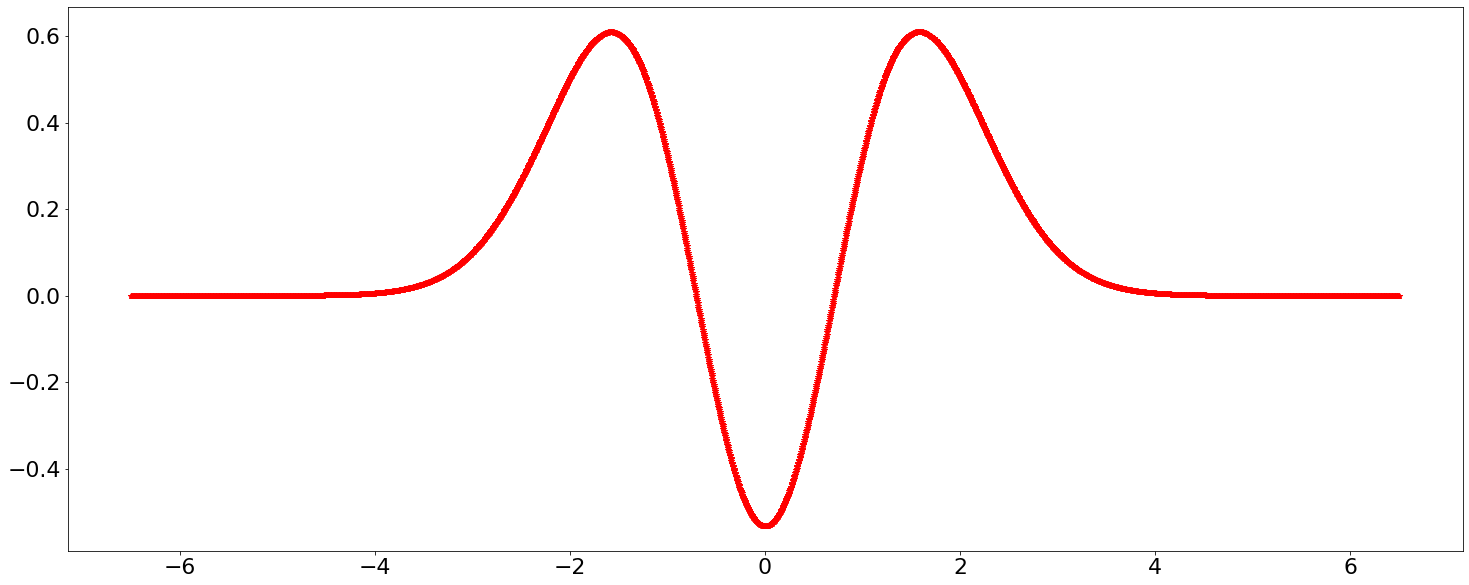

 from i_nodes  (3.440404040404041, 3.5368686868686874)
 eigen  3.502144905704578


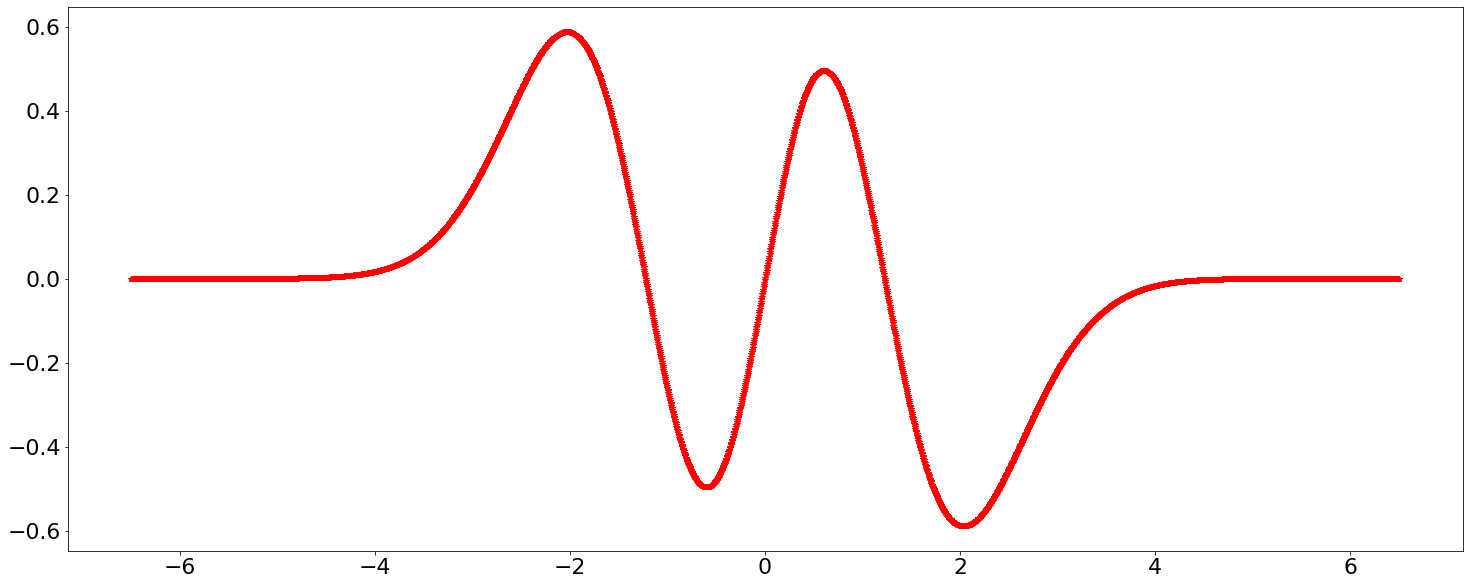

 from i_nodes  (4.501515151515152, 4.597979797979798)
 eigen  4.502094967344259


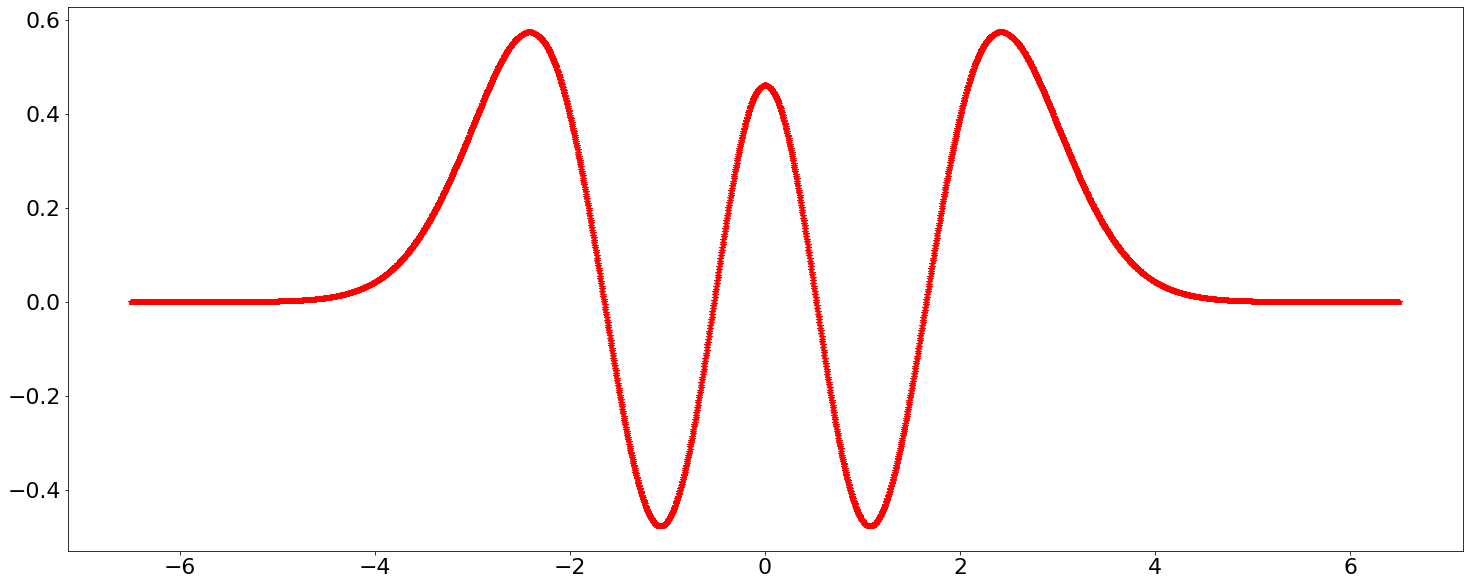

 from i_nodes  (5.466161616161616, 5.562626262626264)
 eigen  5.502028129691047


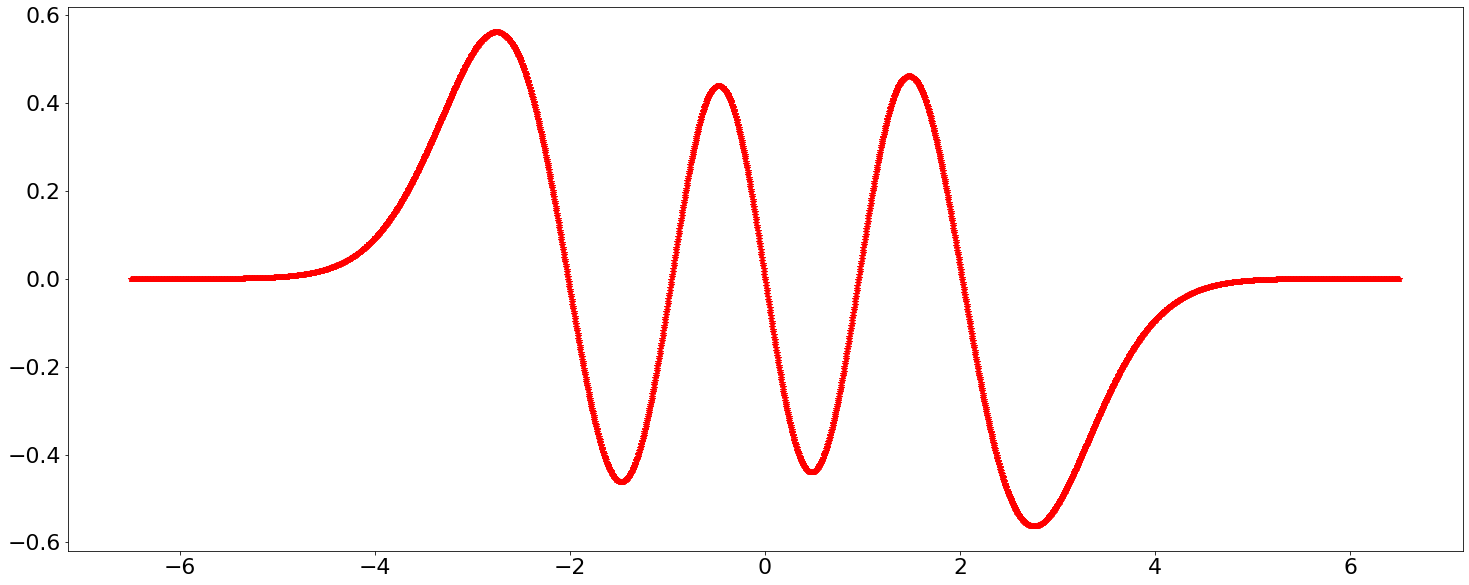

 from i_nodes  (6.430808080808082, 6.527272727272728)
 eigen  6.501950282365103


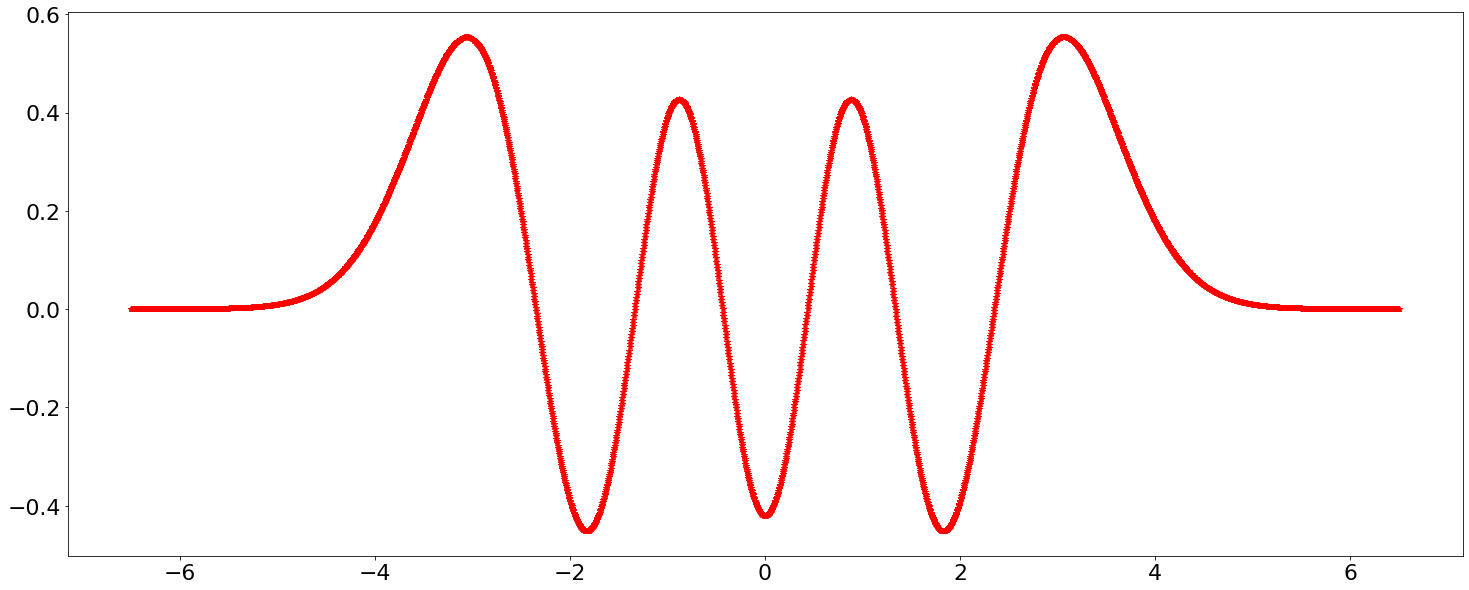

 from i_nodes  (7.491919191919193, 7.588383838383839)
 eigen  7.501871359511436


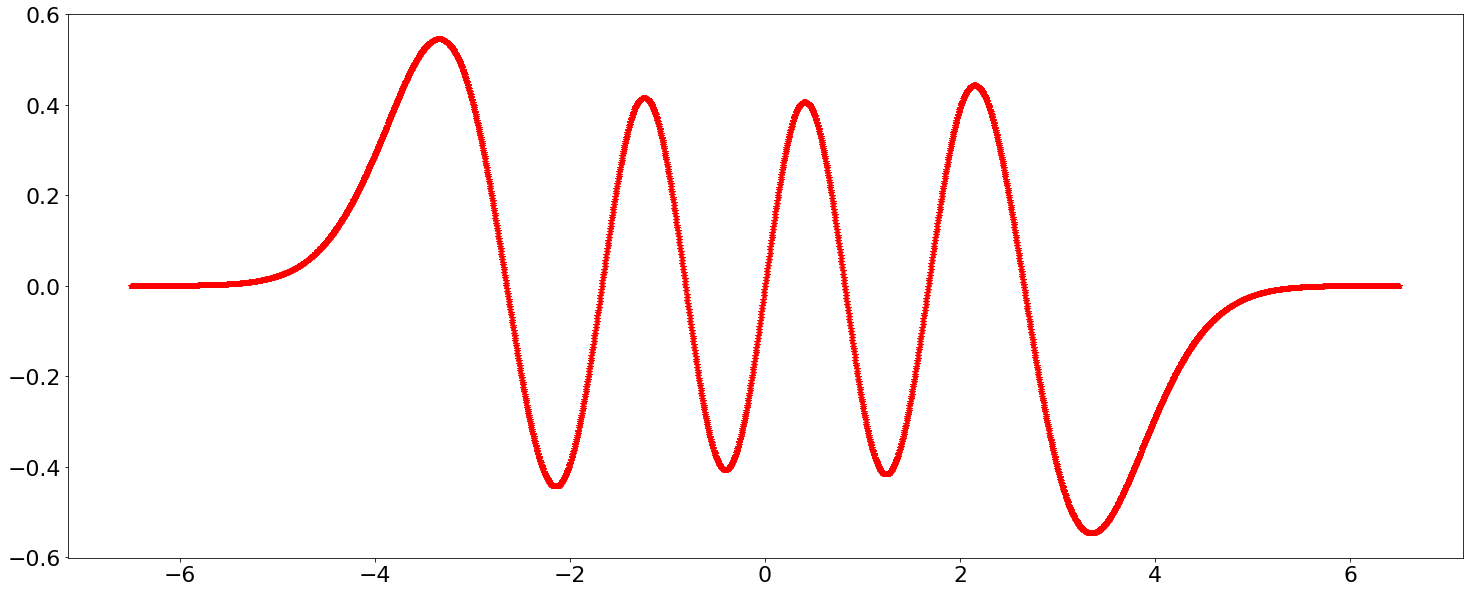

 from i_nodes  (8.456565656565656, 8.553030303030303)
 eigen  8.501797257077593


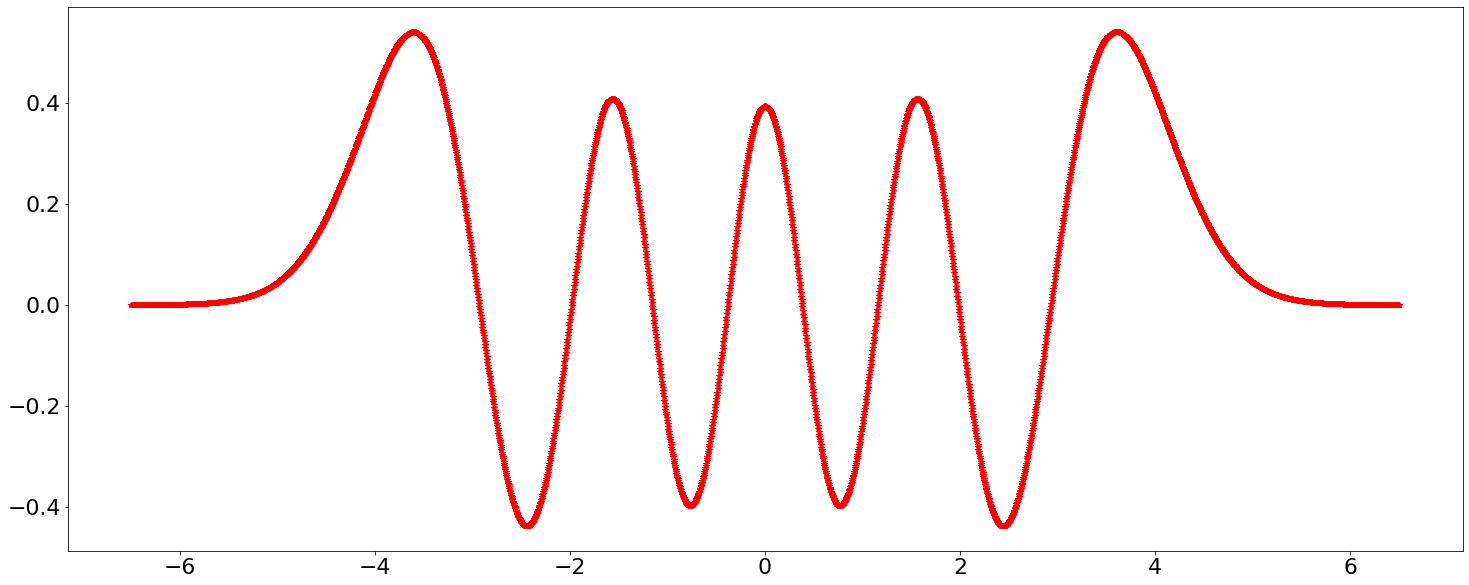

 from i_nodes  (9.421212121212122, 9.517676767676768)
 eigen  9.501721743589695


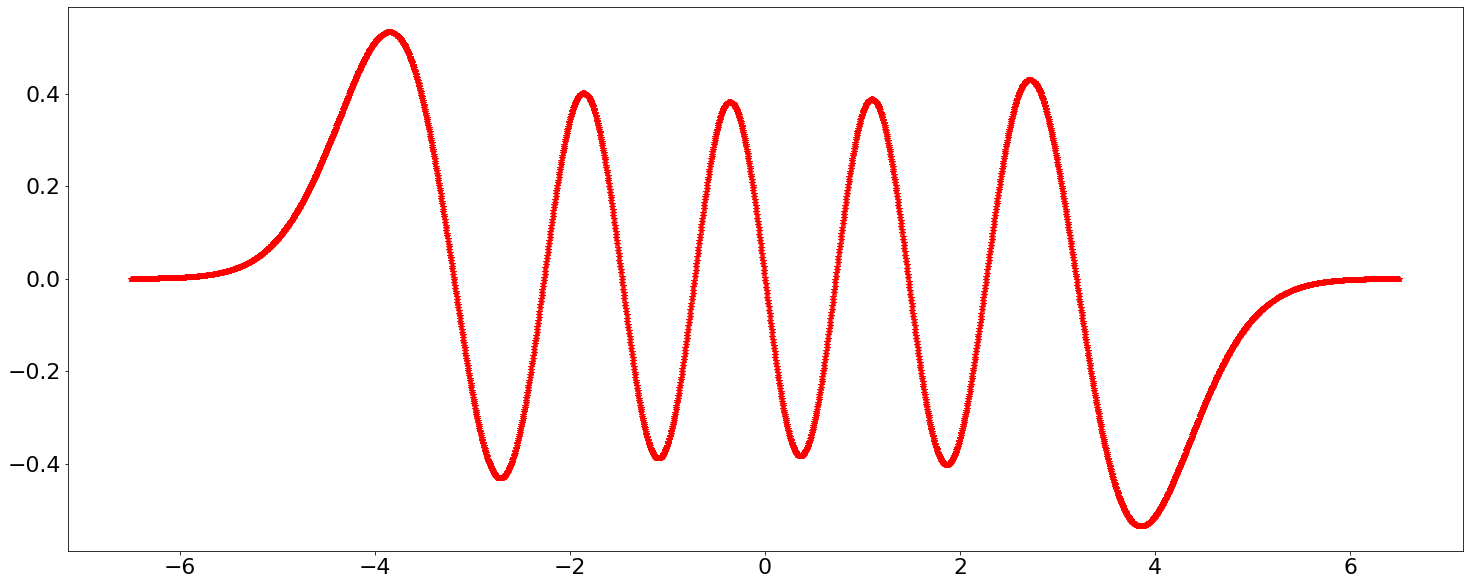

In [6]:
merge_values_arra=[]
for E in E_grid: 
    
    param_f={'grid':grid,
             'y_arra':[[y1_f],[y2_f]],
             'E':E}
    param_b={'grid':np.flip(grid),
             'y_arra':[[y1_b],[y2_b]],
             'E':E}
    y, merge_value= forward_backwards_integration_and_merge_value(param_f, param_b, diff_prob, integrator)
    merge_values_arra.append(merge_value)
    
number_of_nodes, nodes_positions, nodes_indices= utils.get_nodes_information(merge_values_arra, E_grid)

#calculate derivative and check that it does go to infinitive to get rid of bad eigen functions

func_eige_arra=[]
valu_eige_arra=[]
for i_nodes in nodes_positions:
    y, p= find_eigenvalue_secant_method(i_nodes,grid, 
                                    y1_f,y2_f,y1_b,y2_b,
                                    diff_prob, integrator)
    y_deri= utils.f_derivative(grid, y)
    if utils.is_function_smooth(y_deri):
    
        print(" from i_nodes ", i_nodes)
        print(" eigen ", p)
        plt.plot(grid,y,'r*')
        plt.show()

In [6]:
param_f={'grid':grid,
         'y_arra':[[y1_f],[y2_f]],
         'E':1.8294048839909869}
param_b={'grid':np.flip(grid),
         'y_arra':[[y1_b],[y2_b]],
         'E':1.8294048839909869}


#param_f={'grid':grid,
#         'y_arra':[[y1_f],[y2_f]],
#         'E':0.5021439505186782}
#param_b={'grid':np.flip(grid),
#         'y_arra':[[y1_b],[y2_b]],
#         'E':0.5021439505186782}

In [7]:
DP= diff_prob(param_f)
y_f= integrator(DP)
y_f=y_f[0]
number_of_nodes, nodes_positions, nodes_indices= utils.get_nodes_information(DP.F1, grid)

DP_b= diff_prob(param_b)
y_b= integrator(DP_b)
y_b= np.flip(y_b[0])

y_fp= ((y_f[(nodes_indices[0][0])] - y_f[(nodes_indices[0][0] - 1)])
        /(grid[(nodes_indices[0][0])] - grid[(nodes_indices[0][0] - 1)]))
y_bp= ((y_b[(nodes_indices[0][0])] - y_b[(nodes_indices[0][0] - 1)])
        /(grid[(nodes_indices[0][0])] - grid[(nodes_indices[0][0] - 1)]))
merge_value=(y_fp - y_bp)

In [7]:
param_f={'grid':grid,
         'y_arra':[[y1_f],[y2_f]],
         'E':6.827002492529061}
param_b={'grid':np.flip(grid),
         'y_arra':[[y1_b],[y2_b]],
         'E':6.827002492529061}

y, mv= forward_backwards_integration_and_merge_value(param_f, param_b, diff_prob, integrator)
y_deri= utils.f_derivative(grid, y)
print(utils.is_function_smooth(y_deri))

True


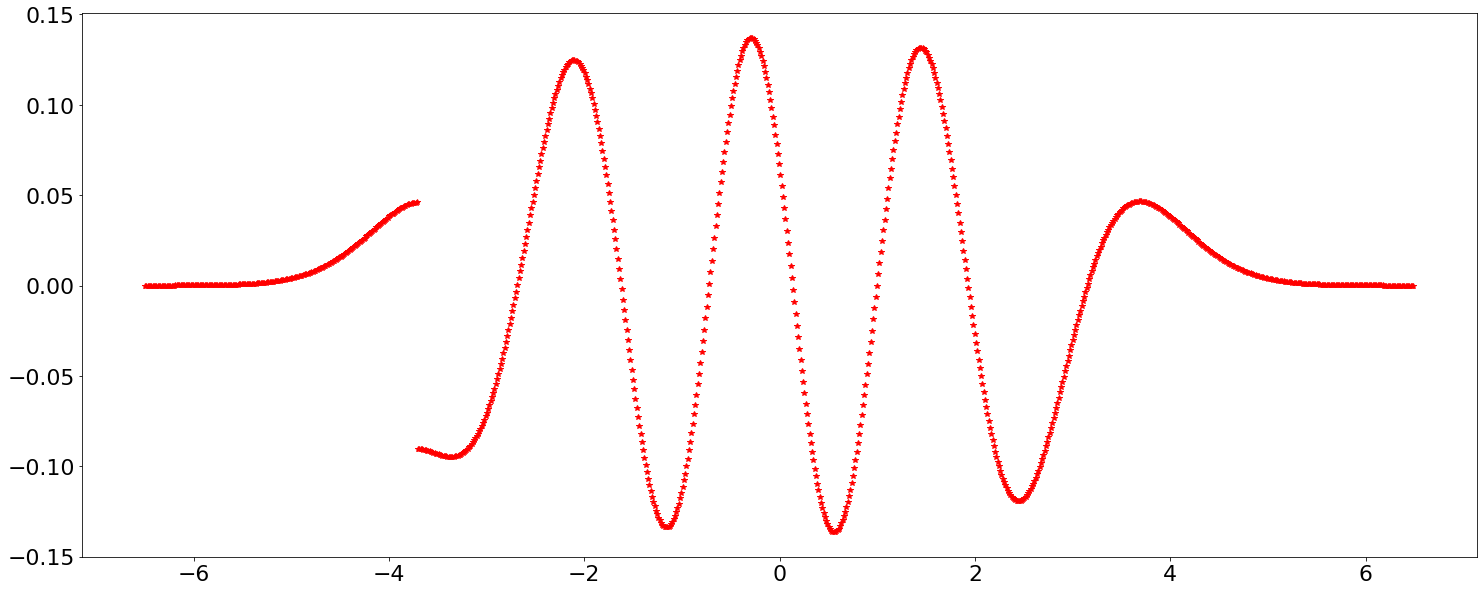

In [8]:
plt.plot(grid[:-1],y_deri,'r*')
plt.show()

In [9]:
temp= np.abs(np.subtract(y_deri[1:],y_deri[:-1]))
max_valu= np.max(temp)
aver= float((np.sum(temp)-max_valu))/float((len(temp) -1)) #average without max value

In [10]:
max_valu

0.13648951611399263

In [11]:
aver

0.0018090176655612194

In [12]:
max_valu/aver

75.44952087112367

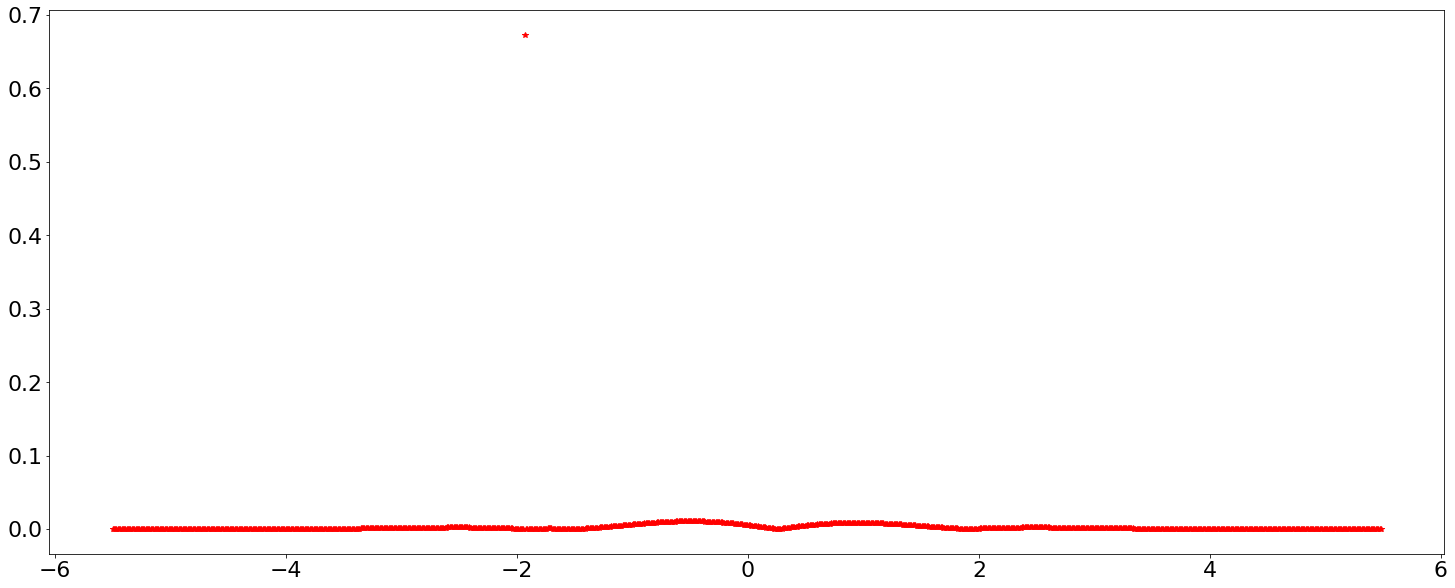

In [31]:
plt.plot(grid[:-2],temp,'r*')
plt.show()

In [26]:
y_deri[300:-600]
    

array([ 0.20900126,  0.21065563,  0.21226596,  0.21383036,  0.21534694,
        0.21681379,  0.21822899,  0.21959061,  0.22089671,  0.22214533,
        0.22333452,  0.22446232,  0.22552676,  0.22652586,  0.22745766,
        0.22832017,  0.22911144,  0.22982949,  0.23047235,  0.23103807,
        0.2315247 ,  0.23193029,  0.23225292,  0.23249067,  0.23264164,
       -0.43998331, -0.44000992, -0.44012102, -0.44031165, -0.4405769 ,
       -0.44091189, -0.44131175, -0.44177168, -0.44228688, -0.4428526 ,
       -0.4434641 , -0.44411668, -0.44480567, -0.44552643, -0.44627433,
       -0.44704479, -0.44783323, -0.44863514, -0.44944598, -0.45026129,
       -0.45107661, -0.45188752, -0.45268961, -0.45347853, -0.45424993,
       -0.45499951, -0.45572301, -0.45641618, -0.45707483, -0.45769478,
       -0.4582719 , -0.4588021 , -0.45928134, -0.45970559, -0.4600709 ,
       -0.46037333, -0.46060903, -0.46077414, -0.46086491, -0.46087759,
       -0.46080852, -0.46065407, -0.46041069, -0.46007488, -0.45

In [22]:
grid[300:-600]

array([-2.1956967 , -2.18468569, -2.17367467, -2.16266366, -2.15165265,
       -2.14064164, -2.12963063, -2.11861962, -2.10760861, -2.0965976 ,
       -2.08558659, -2.07457558, -2.06356456, -2.05255355, -2.04154254,
       -2.03053153, -2.01952052, -2.00850951, -1.9974985 , -1.98648749,
       -1.97547648, -1.96446547, -1.95345445, -1.94244344, -1.93143243,
       -1.92042142, -1.90941041, -1.8983994 , -1.88738839, -1.87637738,
       -1.86536637, -1.85435536, -1.84334434, -1.83233333, -1.82132232,
       -1.81031131, -1.7993003 , -1.78828929, -1.77727828, -1.76626727,
       -1.75525626, -1.74424525, -1.73323423, -1.72222322, -1.71121221,
       -1.7002012 , -1.68919019, -1.67817918, -1.66716817, -1.65615716,
       -1.64514615, -1.63413514, -1.62312412, -1.61211311, -1.6011021 ,
       -1.59009109, -1.57908008, -1.56806907, -1.55705806, -1.54604705,
       -1.53503604, -1.52402503, -1.51301401, -1.502003  , -1.49099199,
       -1.47998098, -1.46896997, -1.45795896, -1.44694795, -1.43

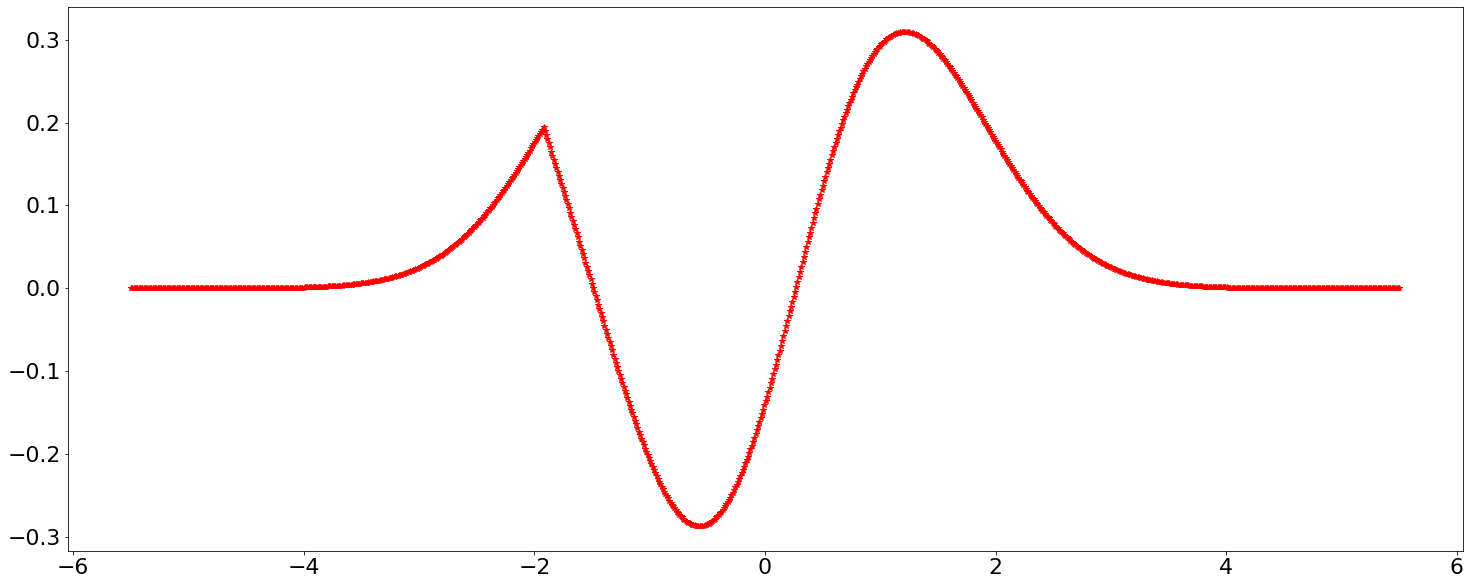

In [8]:
plt.plot(grid,y,'r*')
plt.show()

In [17]:
merge_value

-0.06288274572518215

In [26]:
nodes_indices

[(325, 326), (673, 674)]

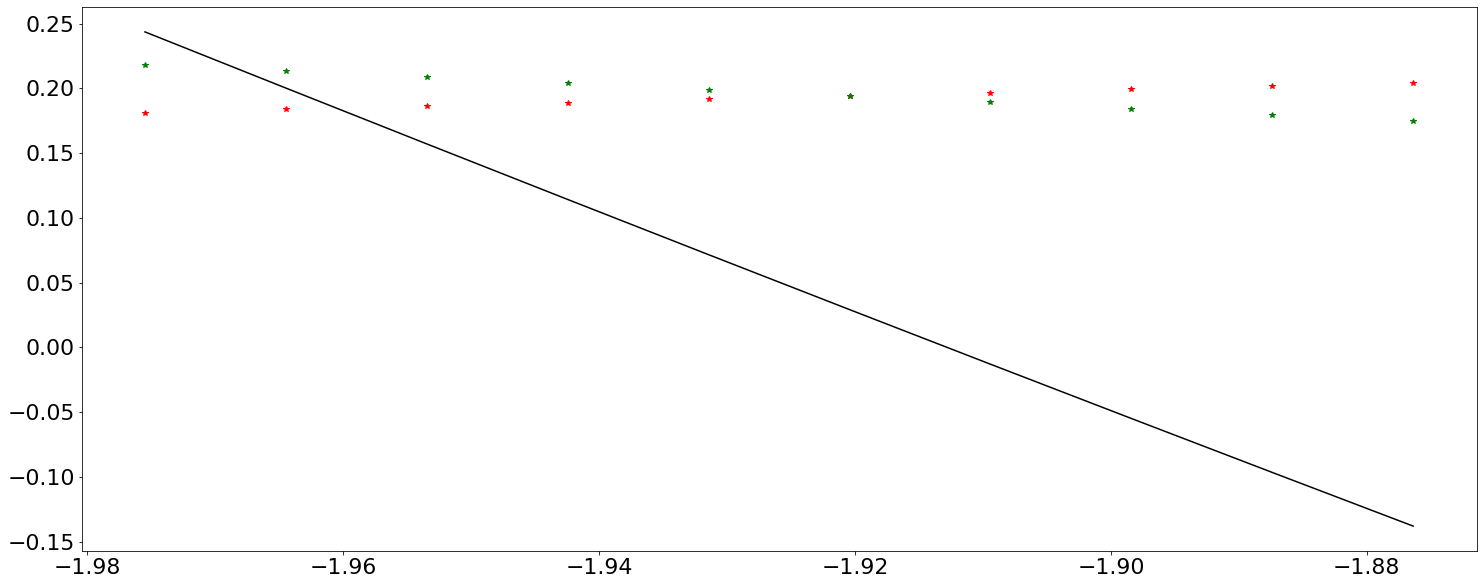

In [27]:
n=320
m=330

plt.plot(grid[n:m],y_f[n:m],'r*', grid[n:m],y_b[n:m],'g*', grid[n:m], DP.F1[n:m], 'k-')
plt.show()

0.0001566769163076076
1.6754878919833516e-06
6.205777003387425e-10
2.220446049250313e-15
 from i_nodes  (0.4975975975975976, 0.5023023023023023)
 eigen  0.5021439505186782


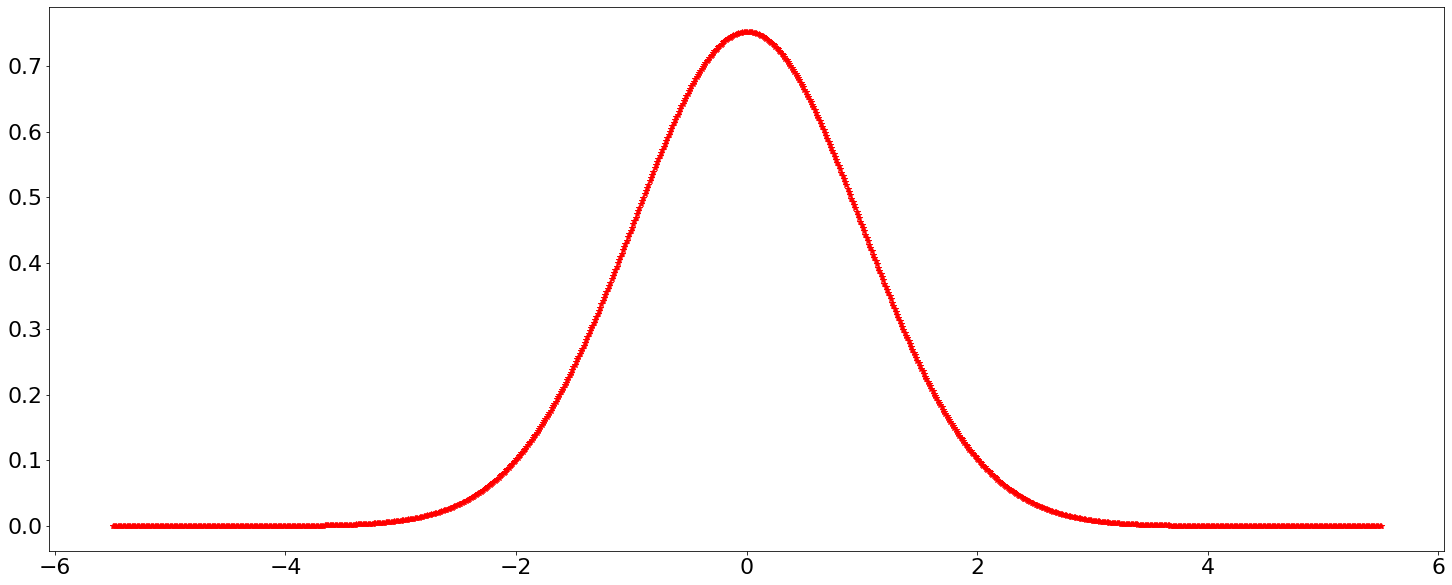

0.0043239022985421816
5.0126189619081885e-06
6.517573014619416e-08
9.729994587814872e-13
0.004588097644195432
6.414599225124107e-07
3.5100047313108007e-09
2.6645352591003757e-15
 from i_nodes  (2.501801801801802, 2.5065065065065064)
 eigen  2.5019177709123905


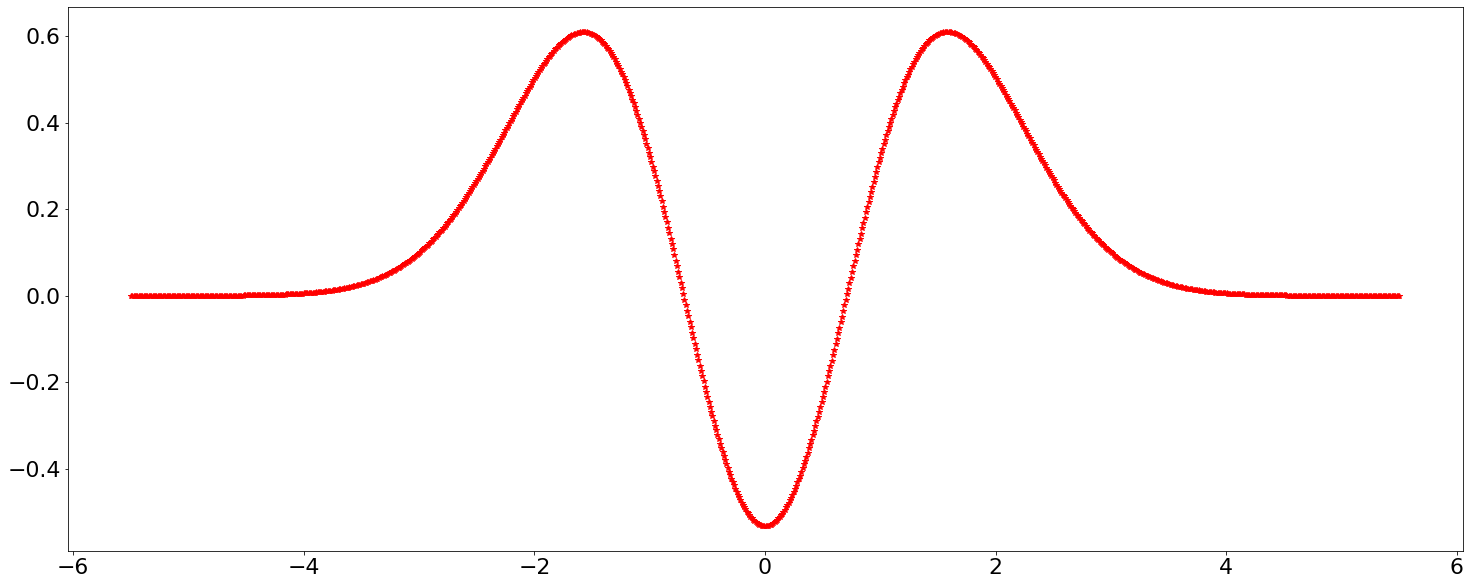

0.0033391066288825932
0.0007309335856731103
0.0022576528989990408
0.0018525157692566019
0.0002820033791657295
0.001580090765765707
0.0013713323161690383
0.0001600606162077689
0.00013927764810306442
1.7845933275584258e-05
0.0013355567621404774
0.001183591490381275
0.009404266713735066
0.0050688545436954335
0.005381264043697875
0.0034902706651549487
0.000913725462905024
0.002694357178618212
0.0021351944159038183
0.0003672536355070477
0.0017827741227098848
0.0015211306957887416
0.00019471920767522022
0.0013309451004688277
0.0011799046912042144
0.00940746416485938
0.005069814839554709
0.005380396807039833
0.0034899108051282823
0.0009135583640564882
0.0026941471681376505
0.002135063368156498
0.00036721178334975235
0.0017826815586170497
0.0015210634579019278
0.0001947029736912853
0.0013308934182734156
0.0011798641190194914
0.009407506285480594
0.0050698275750957755
0.005380385475705296
0.003489906102019713
0.0009135561809370252
0.0026941444253223423
0.002135061656595383
0.0003672112367483215

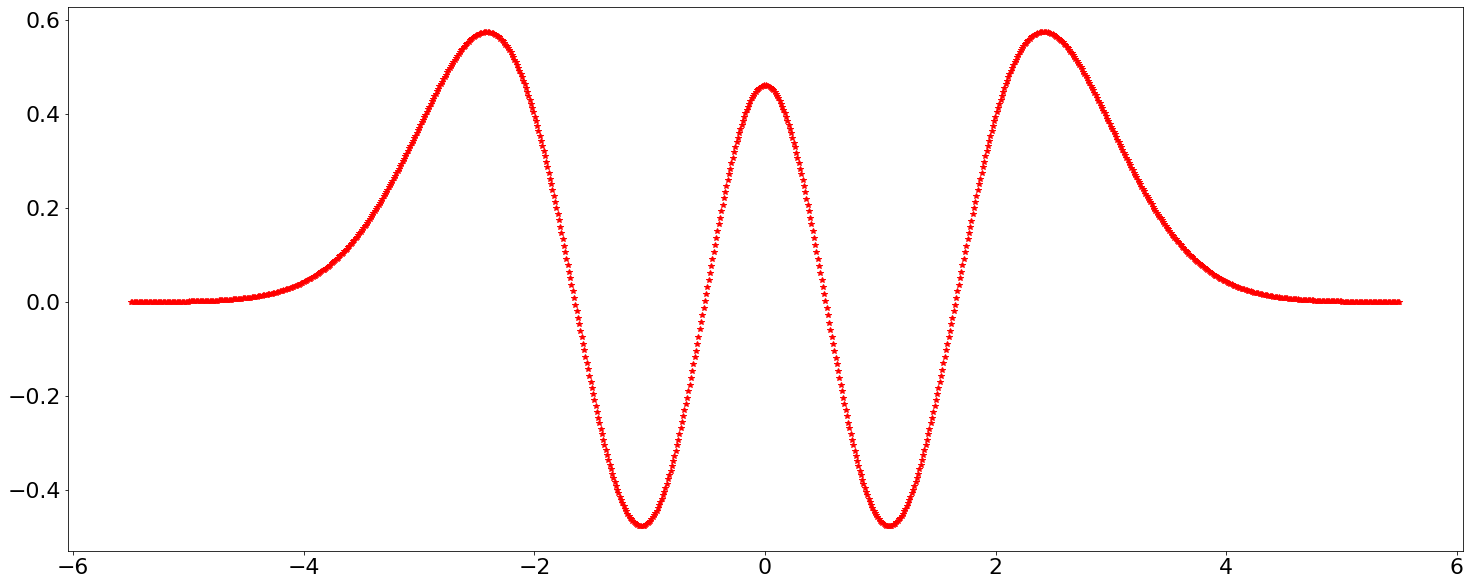

In [7]:
#calculate derivative and check that it does go to infinitive to get rid of bad eigen functions

func_eige_arra=[]
valu_eige_arra=[]
for i_nodes in nodes_positions:
    y, p= find_eigenvalue_secant_method(i_nodes,grid, 
                                    y1_f,y2_f,y1_b,y2_b,
                                    diff_prob, integrator)
    y_deri= utils.f_derivative(grid, y)
    if utils.is_function_smooth(y_deri):
    
        print(" from i_nodes ", i_nodes)
        print(" eigen ", p)
        plt.plot(grid,y,'r*')
        plt.show()

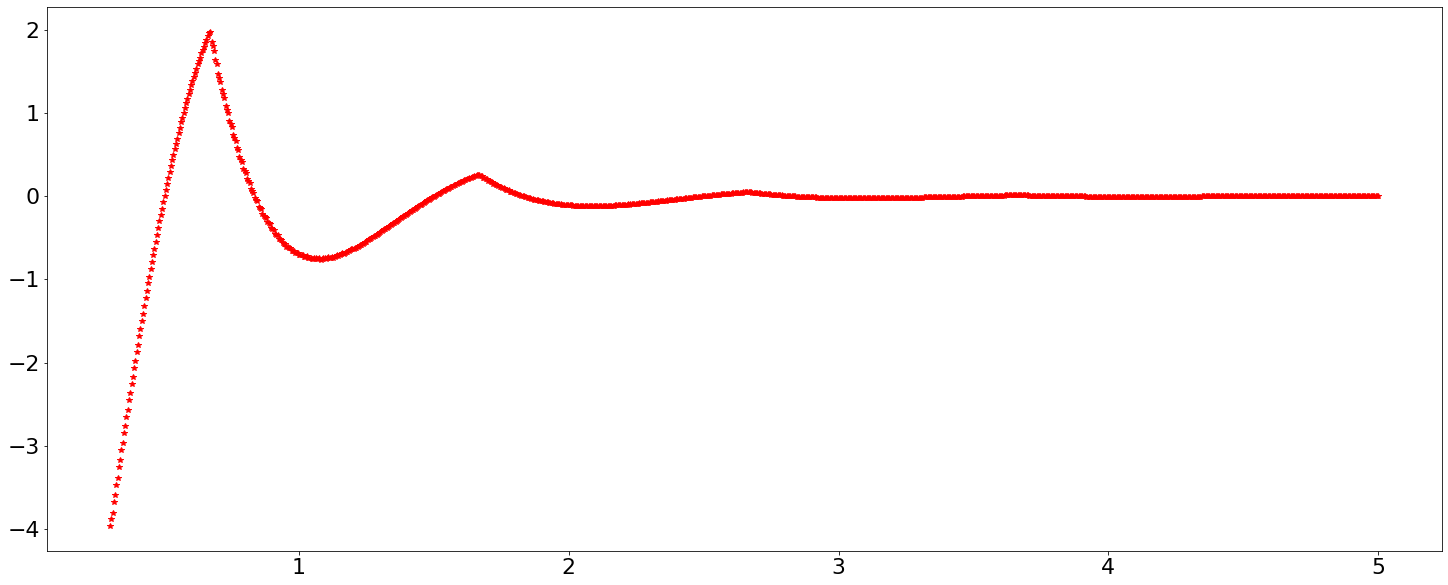

In [7]:
plt.plot(E_grid,merge_values_arra,'r*')
plt.show()

In [19]:
param_f={'grid':grid,
         'y_arra':list([[y1_f],[y2_f]]),
         'E':6.5}
param_b={'grid':np.flip(grid),
         'y_arra':list([[y1_b],[y2_b]]),
         'E':6.5}
y, merge_value= forward_backwards_integration_and_merge_value(param_f, param_b, diff_prob, integrator)
y_norm= utils.normlize_function(param_f['grid'], y)

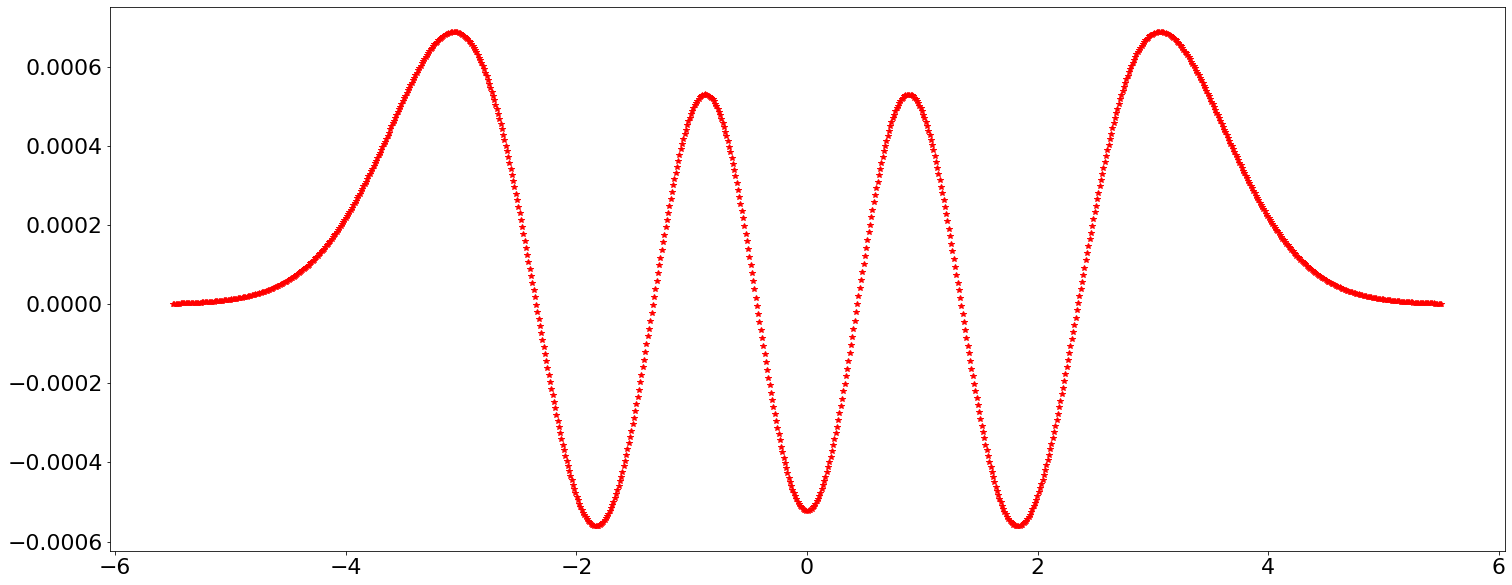

In [20]:
#plt.plot(grid,y,'r*', grid,u0,'g-')
plt.plot(grid,y,'r*')
plt.show()

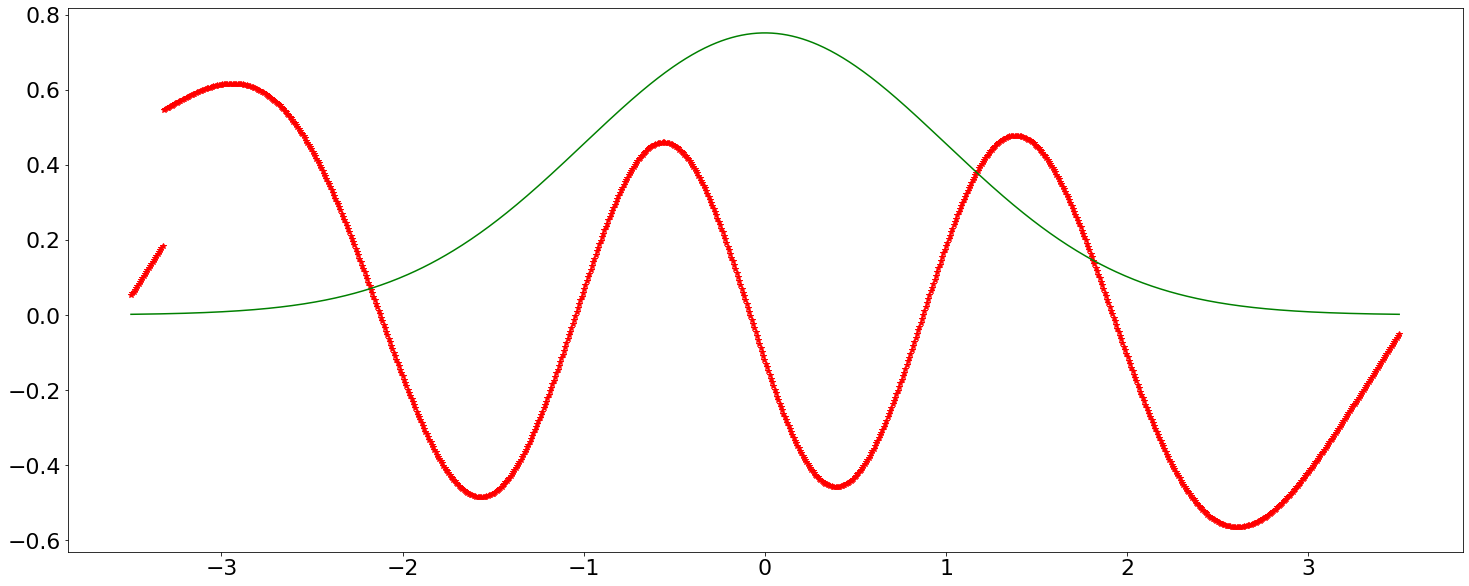

In [18]:
#plt.plot(grid,y,'r*', grid,u0,'g-')
plt.plot(grid,y_norm,'r*', grid,u0,'g-')
plt.show()

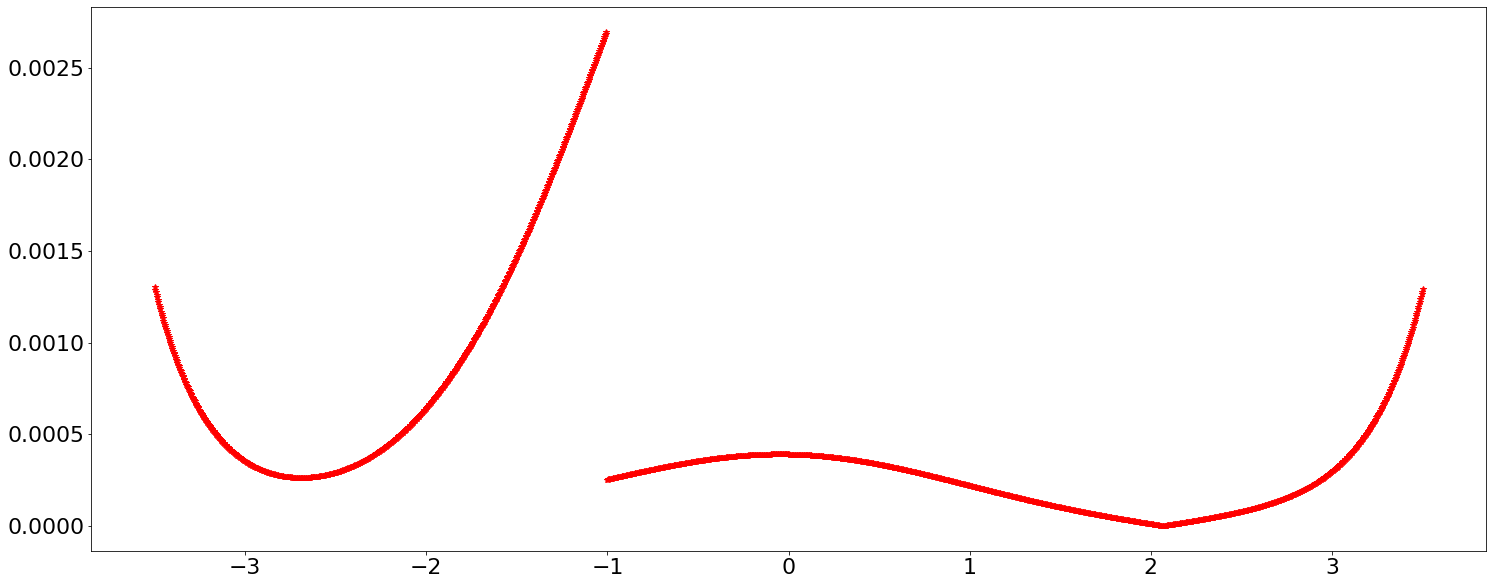

In [9]:
plt.plot(grid,np.abs(np.subtract(y_norm,u0)),'r*')
plt.show()

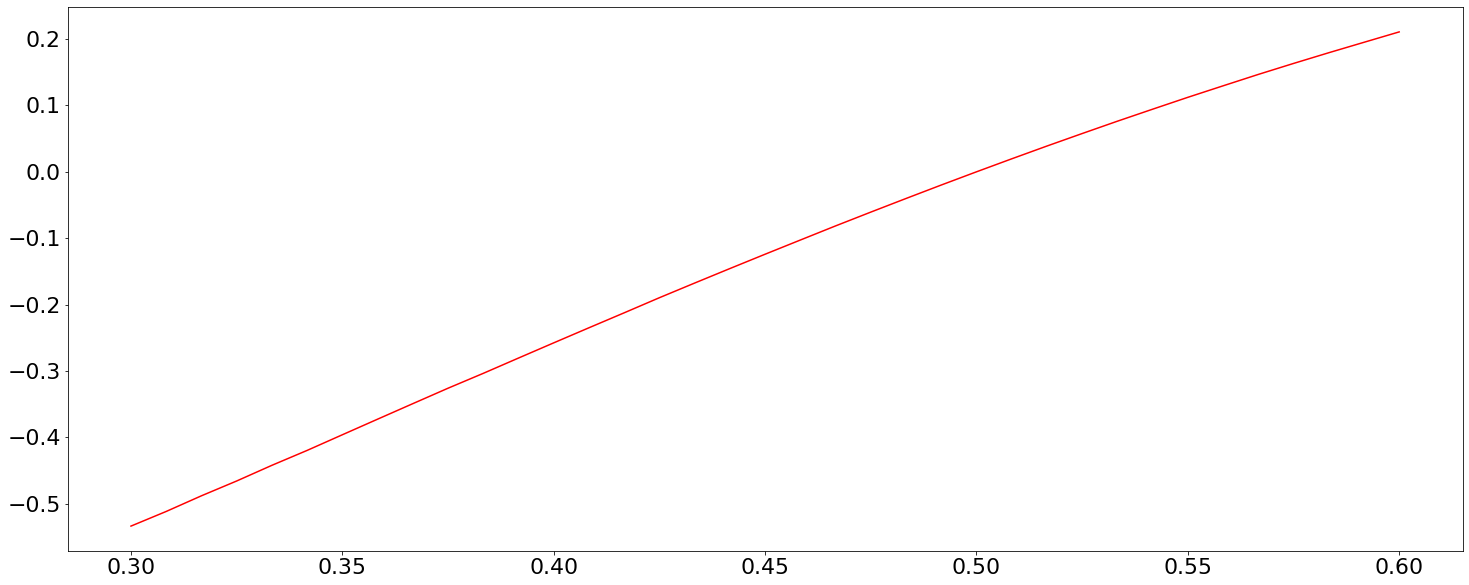

In [6]:

delta= abs(grid[1] - grid[0])
delta_b= abs(grid[-1] - grid[-2])

y1=u0[0]
y2=((u0[1]-u0[0])/delta)
y1_b=u0_b[0]
y2_b=((u0_b[1]-u0_b[0])/delta)

#energy search
merge_value_arra=[]
for E in E_grid:
    param_f={'grid':grid,
             'y_arra':list([[y1],[y2]]),
             'E':E}
    param_b={'grid':np.flip(grid),
             'y_arra':list([[y1_b],[y2_b]]),
             'E':E}
    y, merge_value= forward_backwards_integration_and_merge_value(param_f, param_b, diff_prob, integrator)
    
    merge_value_arra.append(merge_value)
    
    
    
plt.plot(E_grid,merge_value_arra,'r-')
plt.show()

In [8]:
merge_value_arra

[]

In [6]:
    y_arra=[[y1],[y2]]
    DP= DP_QHO(grid, y_arra, E)
    y_f= PC(DP)
    y_f=y_f[0]
    number_of_nodes, nodes_positions, nodes_indices= get_nodes_information(DP.F1, grid)

    y_arra_b=[[y1_b],[y2_b]]
    DP_b= DP_QHO(grid_b, y_arra_b, E)
    y_b= PC(DP_b)
    y_b= np.flip(y_b[0])

    merge_value.append((y_f[(nodes_indices[0][0])] - y_b[(nodes_indices[0][0])]))

[-0.5336754851122685,
 -0.5116198056345723,
 -0.48803695406719794,
 -0.46573965943708373,
 -0.44212700592910903,
 -0.4196735642252063,
 -0.396105616503016,
 -0.3726245257799996,
 -0.3492454730190161,
 -0.3259832709054481,
 -0.30359404792935774,
 -0.2805422434067939,
 -0.25765166176536636,
 -0.23493560987874873,
 -0.2124070228023739,
 -0.18964684780944163,
 -0.16758627591568198,
 -0.1457477219803297,
 -0.12414265968939342,
 -0.10278219092932095,
 -0.0815043730543093,
 -0.06071086996790376,
 -0.04019116300462783,
 -0.019914506660021536,
 -1.1388799314504539e-05,
 0.019553219321535864,
 0.03881118397203226,
 0.05764355021444367,
 0.07623035895010488,
 0.09431259400097419,
 0.11220477646249333,
 0.12952126194862462,
 0.14669784766451388,
 0.1632351998147093,
 0.17936668966024996,
 0.19509126990493164,
 0.21076256005814456]

In [ ]:
y_arra=[[y1],[y2]]
DP= DP_QHO(grid, y_arra, E0)
y_f= PC(DP)
y_f=y_f[0]
number_of_nodes, nodes_positions, nodes_indices= get_nodes_information(DP.F1, grid)

y_arra_b=[[y1_b],[y2_b]]
DP_b= DP_QHO(grid_b, y_arra_b, E0)
y_b= PC(DP_b)
y_b= np.flip(y_b[0])

y= np.array(y_f)
y[nodes_indices[0][0]:]= y_b[nodes_indices[0][0]:]

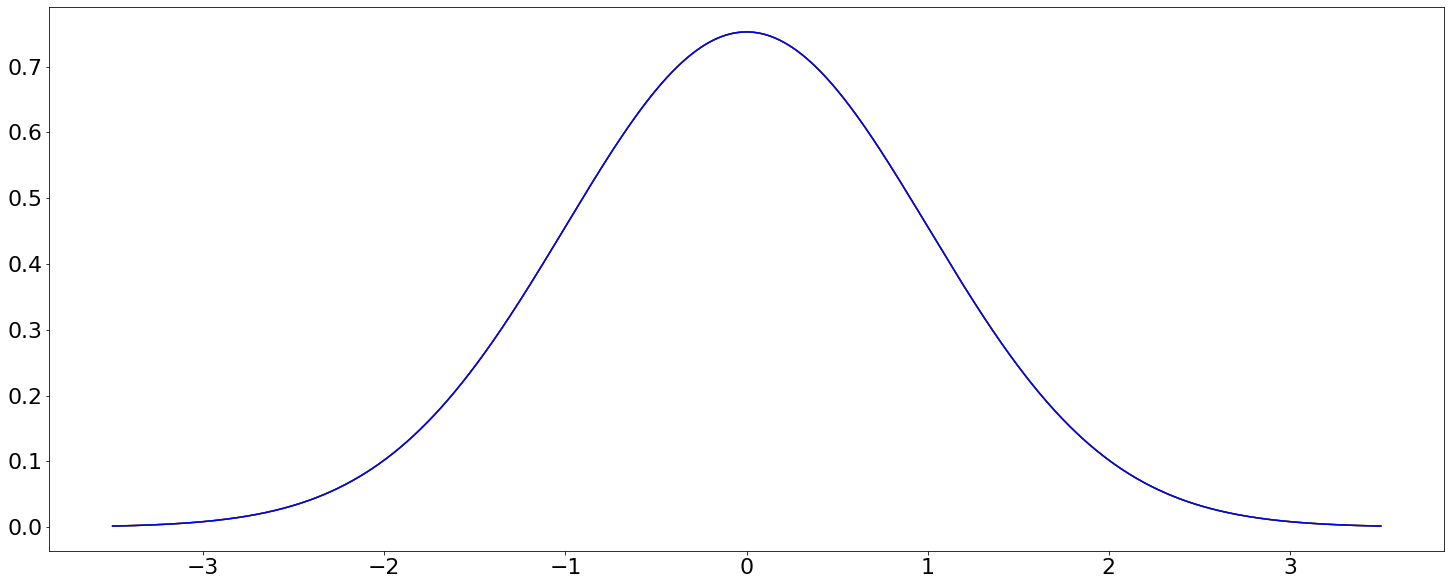

In [7]:
plt.plot(grid,y_f,'r-', grid,y_b,'g-', grid,y,'b-')
plt.show()

In [6]:
#turning point

In [7]:
number_of_nodes, nodes_positions, nodes_indices= get_nodes_information(DP.F1, grid)

In [8]:
nodes_indices

[(1070, 1071), (1927, 1928)]

In [9]:
nodes_positions

[(-1.0015008336112037, -0.9991667222407469),
 (0.9988326108702902, 1.0011667222407472)]

In [10]:
print(DP.F1[1070])
print(DP.F1[1071])

0.0030039197239357662
-0.0016658611666822143


In [11]:
number_of_nodes

2

In [12]:
for i, i_elem in enumerate(temp):
    if i_elem == False:
        print(i)
        break

1072


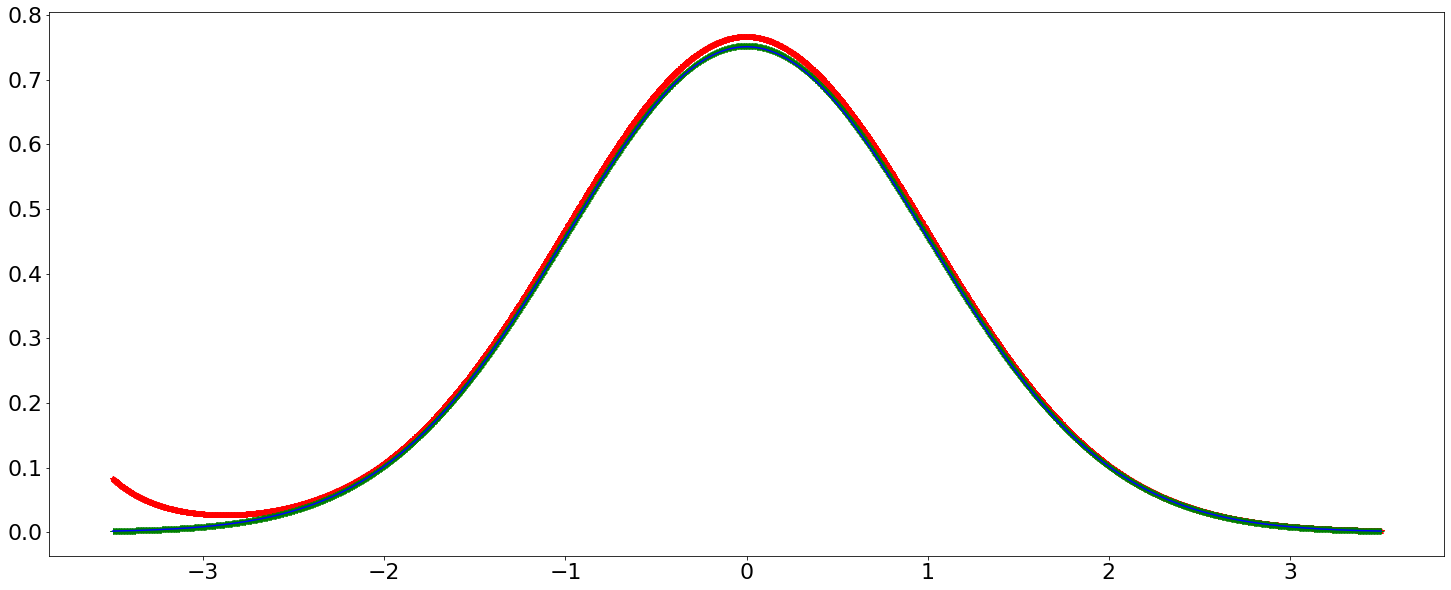

In [6]:
plt.plot(grid,y_rk[0],'r*', grid,y_pc[0],'g+', grid,u0,'b-')
plt.show()

In [7]:
diff_rk=np.abs(u0-y_rk[0])
diff_pc=np.abs(u0-y_pc[0])

In [8]:
h_arra= grid[1:] - grid[:-1]

y1=u1[0]
y2=((u1[1]-u1[0])/h_arra[0])

y_arra=[[y1],[y2]]
DP= DP_QHO(grid, y_arra, E1)
y_rk= RK4(DP)

y_arra=[[y1],[y2]]
DP= DP_QHO(grid, y_arra, E1)
y_pc= PC(DP)

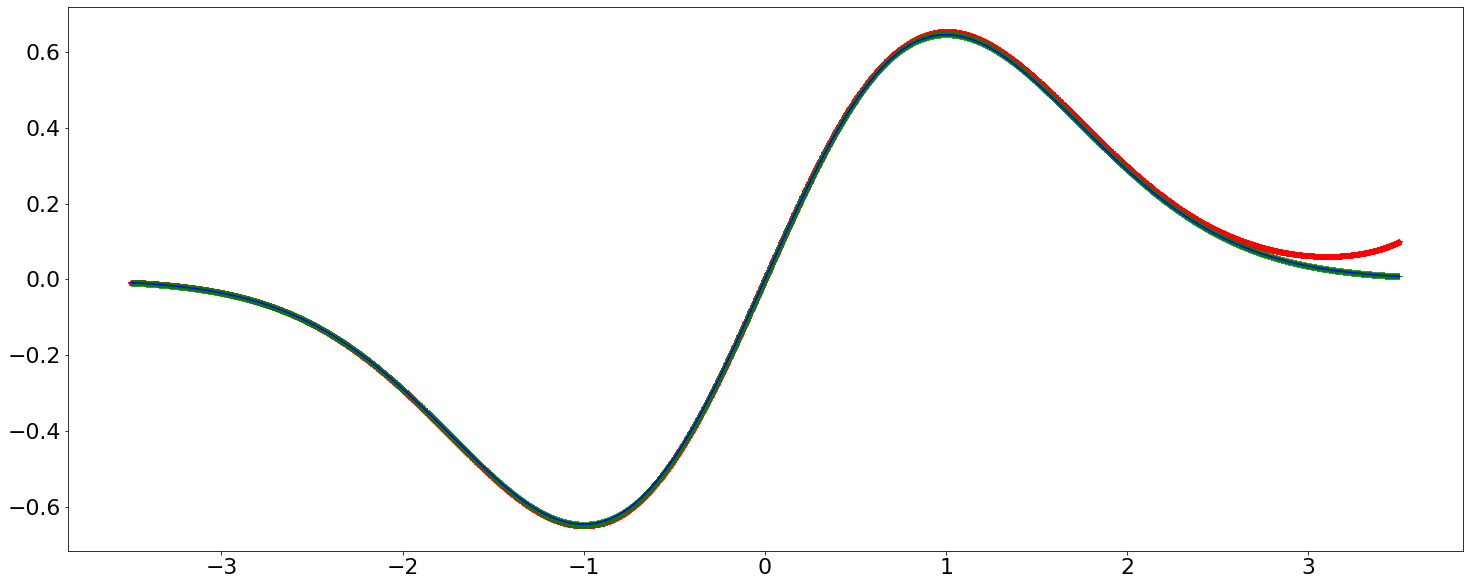

In [9]:
plt.plot(grid,y_rk[0],'r*', grid,y_pc[0],'g+', grid,u1,'b-')
plt.show()